In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import scipy as sp
import torch
import keras as ks

2024-06-05 10:04:07.098987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from keras.datasets import mnist

In [4]:
### datset loading ###
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

In [5]:
train_data.ndim

3

In [6]:
train_data.shape

(60000, 28, 28)

In [7]:
### reshaping the data to 2-d###
train_data = train_data.reshape((60000,28*28))
train_data = train_data.astype('float32')/255

In [8]:
train_data.shape

(60000, 784)

In [9]:
train_data.ndim

2

In [10]:
train_data.dtype

dtype('float32')

In [11]:
test_data = test_data.reshape((10000,28*28))
test_data= test_data.astype('float32')/255

In [12]:
test_data.shape

(10000, 784)

In [13]:
test_data.ndim

2

In [14]:
test_data.astype

<function ndarray.astype>

In [15]:
test_data.dtype

dtype('float32')

In [16]:
##### creating the model for network training #####

In [17]:
from keras import models
from keras import layers

In [18]:
model= models.Sequential()

In [19]:
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))

In [20]:
model.add(layers.Dense(10,activation='softmax'))

In [21]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics="accuracy")

In [22]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [33]:
history = model.fit(train_data,train_labels,batch_size=128,epochs=10)

Epoch 1/10
 15/469 [..............................] - ETA: 3s - loss: 0.0098 - accuracy: 0.9990

2024-06-05 10:06:57.378633: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 4s 7ms/step - loss: 0.0070 - accuracy: 0.9983
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0052 - accuracy: 0.9989
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 6.7096e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 4.8232e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 4.0906e-04 - accuracy: 1.0000
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 3.2795e-04 - accuracy: 

In [24]:
model

In [25]:
model

In [26]:
print(model)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.history

In [29]:
model.layers

In [30]:
for layer in model.layers:
    print(layer)

In [31]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_

In [32]:
model.get_weights()

[array([[ 0.03597873,  0.05589805, -0.04999024, ...,  0.06137922,
          0.06788728,  0.06201659],
        [ 0.04549234, -0.03199369, -0.05182894, ...,  0.01009662,
         -0.01292498, -0.02477341],
        [-0.00214047, -0.01352407, -0.04275655, ..., -0.03291527,
          0.04123679,  0.04338285],
        ...,
        [-0.05215891,  0.01795574,  0.05908644, ...,  0.04609929,
         -0.05320003,  0.06170879],
        [ 0.05303792, -0.00044061,  0.02736463, ..., -0.01453993,
         -0.01197476,  0.04998887],
        [-0.01999363, -0.06074487,  0.01410899, ..., -0.03806914,
          0.02562588,  0.06524165]], dtype=float32),
 array([ 2.24313270e-02, -2.97710765e-02, -2.09868103e-02,  8.94825459e-02,
        -3.33775729e-02,  1.01270810e-01, -4.28345799e-02,  5.06633446e-02,
         2.55940296e-02,  4.98477370e-03, -9.44090933e-02, -3.26585621e-02,
         7.10617080e-02, -7.07514808e-02,  1.06862172e-01,  4.53112945e-02,
        -5.54786390e-03, -9.02562519e-04,  3.11031602e

In [37]:
loss,accuracy = model.evaluate(test_data,test_labels)
print(f'testloss:{loss}')
print(f'test_accuracy:{accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9826
testloss:0.0673149824142456
test_accuracy:0.9825999736785889


In [40]:
# #### plotting the graphs ###
import matplotlib.pyplot as plt
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['']

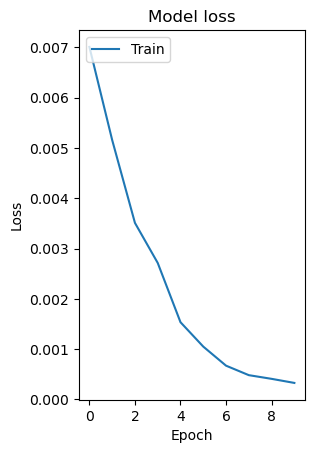

In [42]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')